In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("economic_index.csv")

In [4]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [8]:
df.drop(columns=["Unnamed: 0","year","month"],inplace=True)

In [9]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [11]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

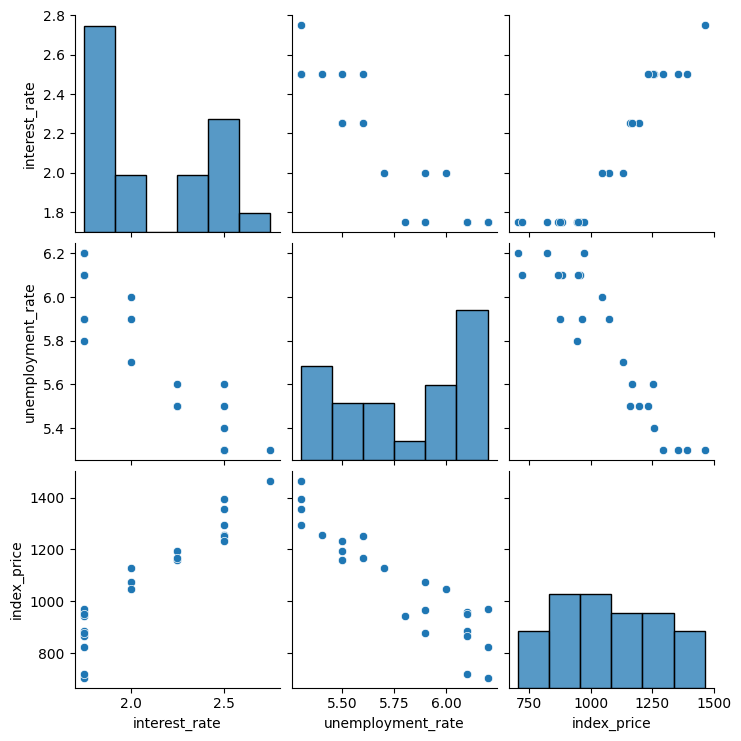

In [13]:
import seaborn as sns
sns.pairplot(df)

In [14]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


In [ ]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

(24, 2)


In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [26]:
from sklearn.preprocessing import StandardScaler


In [27]:
scalar=StandardScaler()

In [28]:
X_train=scalar.fit_transform(X_train)

In [29]:
X_test=scalar.transform(X_test)

In [30]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [31]:
regression.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [32]:
from sklearn.model_selection import cross_val_score
validation=cross_val_score(regression,X_train,Y_train,scoring="neg_mean_squared_error",cv=3)

In [33]:
validation

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [34]:
y_pred=regression.predict(X_test)

In [35]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mse=mean_squared_error(Y_test,y_pred)
mae=mean_absolute_error(Y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(Y_test,y_pred)
ar2=1-((1-r2)*(len(Y_test)-1)/(len(Y_test)- X_test.shape[1]-1))

In [37]:
print(mse,mae,rmse,r2,ar2)

5793.762887712569 59.935781523235484 76.11677139574805 0.8278978091457145 0.7131630152428576


In [46]:
regression.predict(scalar.transform([[2.5, 5.3]]))


c:\Users\Sumed\anaconda3\envs\ml_class\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1341.42873089])

[  88.27275507 -116.25716066]
